In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [155]:
# Loading Dataset
data = pd.read_excel(r'F:\JUPTER NOTEBOOK\RAVI SHANKAR PROJECTS\SUNBASE DATA\customer_churn_large_dataset.xlsx')

In [156]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [157]:
rows = data.shape[0]
columns = data.shape[1]

print('Rows:', rows ,'\nColumns:',columns)

Rows: 100000 
Columns: 9


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [159]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,100000.0,50000.500000,28867.657797,1.0,25000.75,50000.50,75000.25,100000.0
Age,100000.0,44.027020,15.280283,18.0,31.00,44.00,57.00,70.0
Subscription_Length_Months,100000.0,12.490100,6.926461,1.0,6.00,12.00,19.00,24.0
Monthly_Bill,100000.0,65.053197,20.230696,30.0,47.54,65.01,82.64,100.0
Total_Usage_GB,100000.0,274.393650,130.463063,50.0,161.00,274.00,387.00,500.0
Churn,100000.0,0.497790,0.499998,0.0,0.00,0.00,1.00,1.0


In [160]:
# Check for duplicat values in data
data.duplicated().sum()

0

In [161]:
# Check for null values in data
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [162]:
# Categorical Columns
cat_cols = ['Name', 'Gender', 'Location','Churn']

In [163]:
# Nuerical Columns
num_cols =['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB']

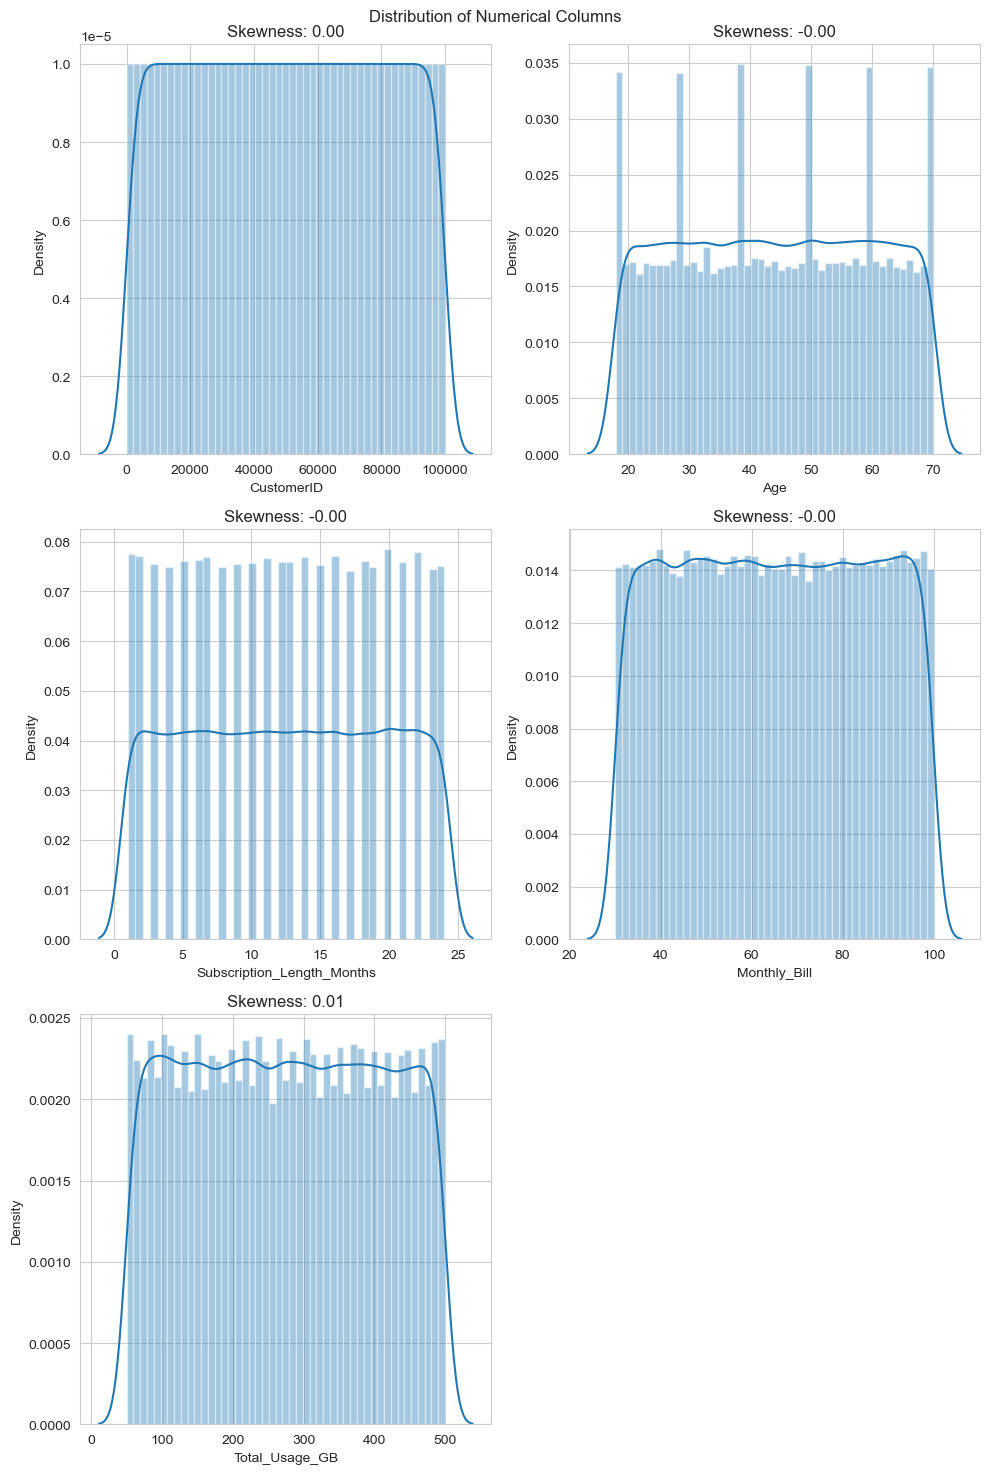

In [164]:
# Distribution of Numerical columns
plt.figure(figsize=(10,15))
r = 1
for i in num_cols:
    plt.subplot(3,2,r)
    sns.distplot(data[i])
    plt.title('Skewness: %.2f'%data[i].skew())
    r+=1
plt.suptitle('Distribution of Numerical Columns')
plt.tight_layout()
plt.show()

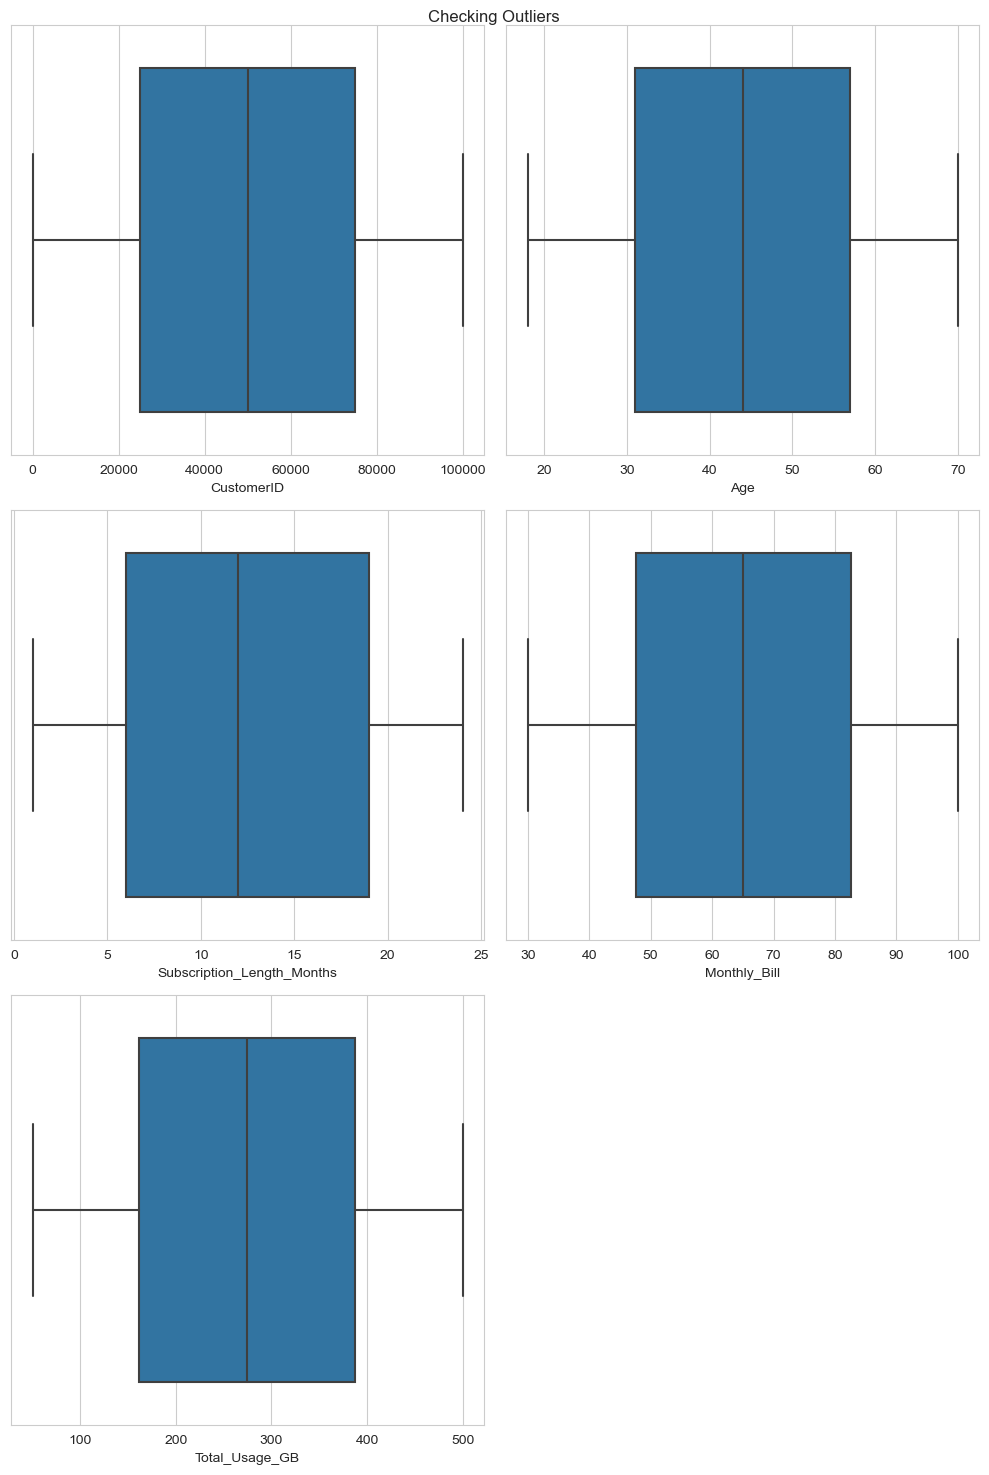

In [165]:
# Check Outliers using boxplot
plt.figure(figsize=(10,15))
r = 1
for i in num_cols:
    plt.subplot(3,2,r)
    sns.boxplot(data[i])
    r+=1
plt.suptitle('Checking Outliers')
plt.tight_layout()
plt.show()

In [218]:
# There is no outlier in the data

<AxesSubplot:>

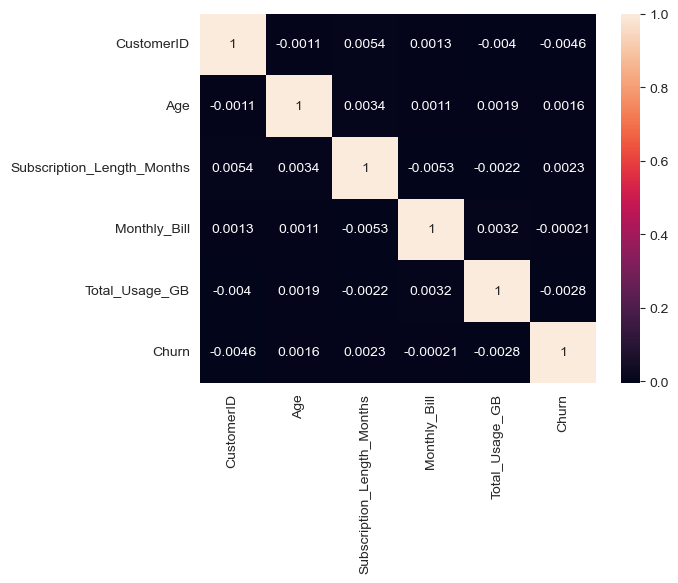

In [166]:
# Check coorelation between columns using heatmap
sns.heatmap(data.corr(), annot = True)

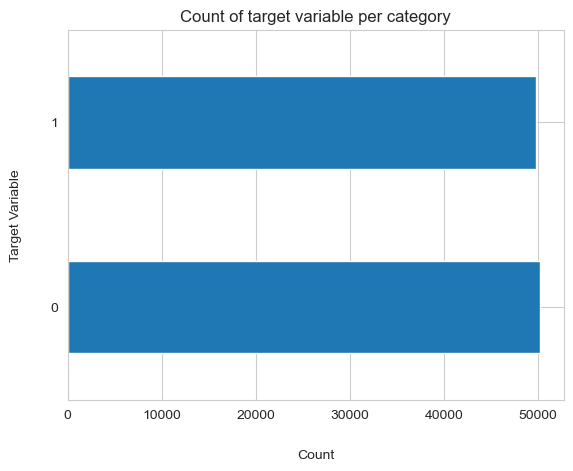

In [167]:
# finding number of Churn and Non-Churn using count plot
data['Churn'].value_counts().plot(kind = 'barh')
plt.xlabel('Count', labelpad= 20)
plt.ylabel('Target Variable', labelpad= 20)
plt.title('Count of target variable per category')
plt.show()

In [168]:
# Percentage of hurn and Non-Churn in the data
(data.Churn.value_counts()/ len(data.Churn))*100

0    50.221
1    49.779
Name: Churn, dtype: float64

# Data Cleaning

In [169]:
# We copy the data into a new variable without effecting original data
data_new = data.copy()

In [170]:
data_new

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [171]:
# Drop the unwanted columns 
data_new.drop(columns = ['CustomerID', 'Name'], inplace =True, axis = 1)

In [172]:
data_new

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


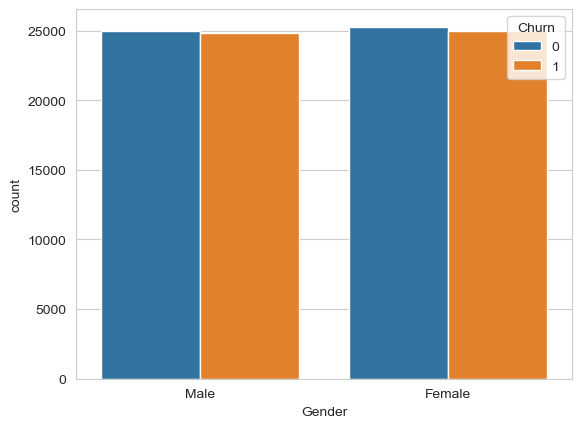

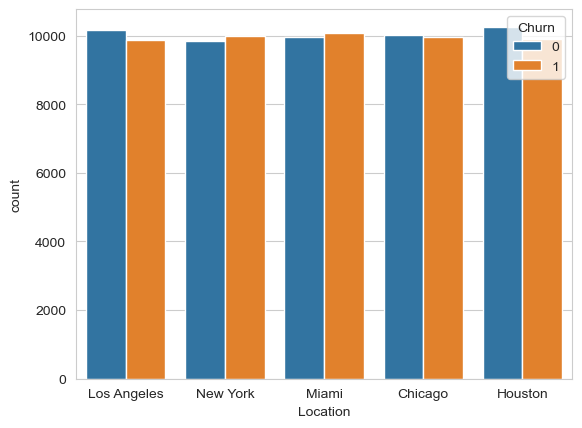

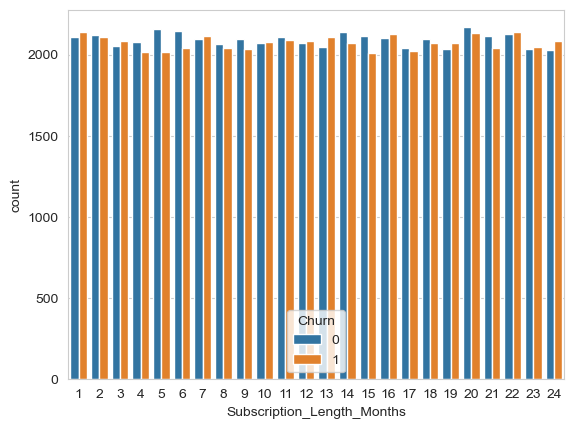

In [173]:
for i, predictor in enumerate(data_new.drop(columns=['Churn', 'Total_Usage_GB', 'Monthly_Bill', 'Age'])):
    plt.figure(i)
    sns.countplot(data=data_new, x=predictor, hue='Churn')

In [174]:
# Encolde Male & Female into 1 & 0
gender_map = {'Male':1, 'Female':0}
data_new['Gender'] = data_new['Gender'].map(gender_map)

In [175]:
data_new

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,Los Angeles,17,73.36,236,0
1,62,0,New York,1,48.76,172,0
2,24,0,Los Angeles,5,85.47,460,0
3,36,0,Miami,3,97.94,297,1
4,46,0,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,1,Houston,23,55.13,226,1
99996,62,0,New York,19,61.65,351,0
99997,64,1,Chicago,17,96.11,251,1
99998,51,0,New York,20,49.25,434,1


In [176]:
data_new.Subscription_Length_Months.unique()

array([17,  1,  5,  3, 19, 15, 10, 12, 20, 13,  8, 23,  2,  4, 18,  9, 14,
       16,  6,  7, 24, 22, 11, 21], dtype=int64)

In [177]:
# Group the Subscription_Length_Months in bins of 12 months
bin_edges = list(range(1, 26, 12))
bin_labels = [f"{edge}-{edge + 11}" for edge in bin_edges[:-1]]
data_new['Subscription_Length_Bins'] = \
pd.cut(data_new['Subscription_Length_Months'], bins=bin_edges, labels=bin_labels, include_lowest=True)

In [178]:
data_new

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Subscription_Length_Bins
0,63,1,Los Angeles,17,73.36,236,0,13-24
1,62,0,New York,1,48.76,172,0,1-12
2,24,0,Los Angeles,5,85.47,460,0,1-12
3,36,0,Miami,3,97.94,297,1,1-12
4,46,0,Miami,19,58.14,266,0,13-24
...,...,...,...,...,...,...,...,...
99995,33,1,Houston,23,55.13,226,1,13-24
99996,62,0,New York,19,61.65,351,0,13-24
99997,64,1,Chicago,17,96.11,251,1,13-24
99998,51,0,New York,20,49.25,434,1,13-24


<AxesSubplot:xlabel='Churn', ylabel='count'>

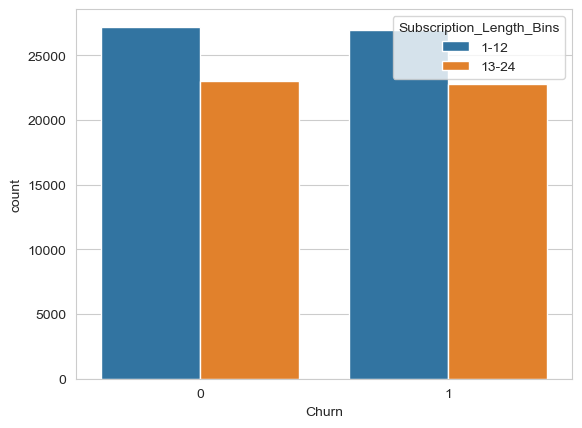

In [179]:
sns.countplot(data_new.Churn, hue = data_new.Subscription_Length_Bins)

In [180]:
# drop the Subscription_Length_Months column
data_new.drop('Subscription_Length_Months', inplace = True, axis =1)

In [181]:
data_new

,Age,Gender,Location,Monthly_Bill,Total_Usage_GB,Churn,Subscription_Length_Bins
0,63,1,Los Angeles,73.36,236,0,13-24
1,62,0,New York,48.76,172,0,1-12
2,24,0,Los Angeles,85.47,460,0,1-12
3,36,0,Miami,97.94,297,1,1-12
4,46,0,Miami,58.14,266,0,13-24
...,...,...,...,...,...,...,...
99995,33,1,Houston,55.13,226,1,13-24
99996,62,0,New York,61.65,351,0,13-24
99997,64,1,Chicago,96.11,251,1,13-24
99998,51,0,New York,49.25,434,1,13-24


In [182]:
# encode location column using get dummies
location = pd.get_dummies(data_new.Location, drop_first= True)
location

,Houston,Los Angeles,Miami,New York
0,0,1,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
99995,1,0,0,0
99996,0,0,0,1
99997,0,0,0,0
99998,0,0,0,1


In [183]:
data_new = pd.concat([data_new,location], axis =1)
data_new

,Age,Gender,Location,Monthly_Bill,Total_Usage_GB,Churn,Subscription_Length_Bins,Houston,Los Angeles,Miami,New York
0,63,1,Los Angeles,73.36,236,0,13-24,0,1,0,0
1,62,0,New York,48.76,172,0,1-12,0,0,0,1
2,24,0,Los Angeles,85.47,460,0,1-12,0,1,0,0
3,36,0,Miami,97.94,297,1,1-12,0,0,1,0
4,46,0,Miami,58.14,266,0,13-24,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,33,1,Houston,55.13,226,1,13-24,1,0,0,0
99996,62,0,New York,61.65,351,0,13-24,0,0,0,1
99997,64,1,Chicago,96.11,251,1,13-24,0,0,0,0
99998,51,0,New York,49.25,434,1,13-24,0,0,0,1


In [184]:
data_new.drop(columns = 'Location', inplace = True)

In [185]:
bins = pd.get_dummies(data_new.Subscription_Length_Bins, drop_first= True)

In [186]:
bins

,13-24
0,1
1,0
2,0
3,0
4,1
...,...
99995,1
99996,1
99997,1
99998,1


In [187]:
data_new = pd.concat([data_new, bins],  axis=1)

In [188]:
data_new.drop(columns = 'Subscription_Length_Bins', inplace=True, axis=1)

In [189]:
data_new

,Age,Gender,Monthly_Bill,Total_Usage_GB,Churn,Houston,Los Angeles,Miami,New York,13-24
0,63,1,73.36,236,0,0,1,0,0,1
1,62,0,48.76,172,0,0,0,0,1,0
2,24,0,85.47,460,0,0,1,0,0,0
3,36,0,97.94,297,1,0,0,1,0,0
4,46,0,58.14,266,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
99995,33,1,55.13,226,1,1,0,0,0,1
99996,62,0,61.65,351,0,0,0,0,1,1
99997,64,1,96.11,251,1,0,0,0,0,1
99998,51,0,49.25,434,1,0,0,0,1,1


# Split the data into Train & Test

In [190]:
x = data_new.drop(columns = 'Churn', axis =1)
y = data_new.Churn

In [219]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [192]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=10)

## Logistic Regression

In [193]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [194]:
lg.fit(x_train, y_train)

LogisticRegression()

In [195]:
y_pred_test = lg.predict(x_test)

In [199]:
from sklearn.metrics import confusion_matrix

In [201]:
accuracy = confusion_matrix(y_test, y_pred_test)
accuracy

array([[8470, 6638],
       [8339, 6553]], dtype=int64)

In [203]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_test)
accuracy

0.5007666666666667

## Decision Tree Classifier

In [204]:
from sklearn.tree import DecisionTreeClassifier

In [208]:
tree = DecisionTreeClassifier(criterion = "gini",random_state = 10,max_depth=6, min_samples_leaf=8)

In [210]:
model = tree.fit(x_train, y_train)

In [212]:
y_pred_test = model.predict(x_test)

In [214]:
model_score = tree.score(x_test, y_pred_test)

In [215]:
model_score

1.0

In [216]:
from sklearn.metrics import classification_report

In [217]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.51      0.38      0.43     15108
           1       0.50      0.63      0.56     14892

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000



## Model Tuning

In [222]:
from sklearn.ensemble import RandomForestClassifier

In [220]:
# Define Hyperparameter to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [223]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Number of cross-validation folds
                           scoring='accuracy',
                           verbose=2,
                           n_jobs=-1)  # Use all available CPU cores

In [224]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [226]:
best_params = grid_search.best_params_
best_params

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [228]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

In [229]:
best_predictions = best_model.predict(x_test)
best_accuracy = accuracy_score(y_test, best_predictions)

In [230]:
# Best Hyper Parameters and best model accuracy
print("Best Model Accuracy:", best_accuracy)
print("Best Hyperparameters:", best_params)

Best Model Accuracy: 0.49906666666666666
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


**Even by tuning the model, we cannot get the best outcome**

**We can sse that Decision Tree Classifier works better as the score is much better as compared to another models**